# Community Innovation Survey (2021)

`Jupyter Notebook` is a great tool for data analysis and presentation. It is also a great tool for teaching.

In this notebook, we will go through Community Innovation Survey (2021) data and do some analysis together. __It is purely for teaching purpose, and should not be used for any other purpose.__

__Note:__ I use `data.table` and `%>%` intentionally to make the code more readable. If you are not familiar with these two, please check [this](https://rdatatable.gitlab.io/data.table/) and [this](https://magrittr.tidyverse.org/).

In [1]:
# library key packages
# install them if you don't have them
# install.packages(c("data.table", "magrittr", "knitr", "ggplot2"))
library(data.table)
library(magrittr)
library(knitr)
library(ggplot2)

In [2]:
# read data
file_path <- "../data/innovation_survey/extmidp21.csv"
survey <- fread(file_path)
str(survey)

Classes ‘data.table’ and 'data.frame':	5083 obs. of  284 variables:
 $ id          : int  300127 301003 301078 301084 301189 301282 301396 301420 301591 301948 ...
 $ branche     : chr  "Elektroindustrie" "Metallerzeugung/-bearbeitung" "Maschinenbau" "Energie/Bergbau/Mineraloel" ...
 $ bran_4      : chr  "Forschungsintensive Industrie" "Sonstige Industrie" "Forschungsintensive Industrie" "Sonstige Industrie" ...
 $ filter      : chr  "nein" "ja" "nein" "ja" ...
 $ ost         : chr  "ost" "ost" "west" "west" ...
 $ ustaat      : chr  "" "" "" "" ...
 $ gb          : chr  "Bereich" "Bereich" "Bereich" "Bereich" ...
 $ bges        : num  38.4 4.05 497.85 311.48 751.19 ...
 $ gk3n        : chr  "50-249Besch" "<50Besch" ">=250Besch" "50-249Besch" ...
 $ bges18      : num  38.4 5.06 NA 290.13 NA ...
 $ gk3n18      : chr  "50-249Besch" "<50Besch" "" "50-249Besch" ...
 $ bges19      : num  38.4 4.05 NA 297.04 NA ...
 $ gk3n19      : chr  "50-249Besch" "<50Besch" "" "50-249Besch" ...
 $ bhsp  

## Industry 

We will first look at the industry distribution of the sample.

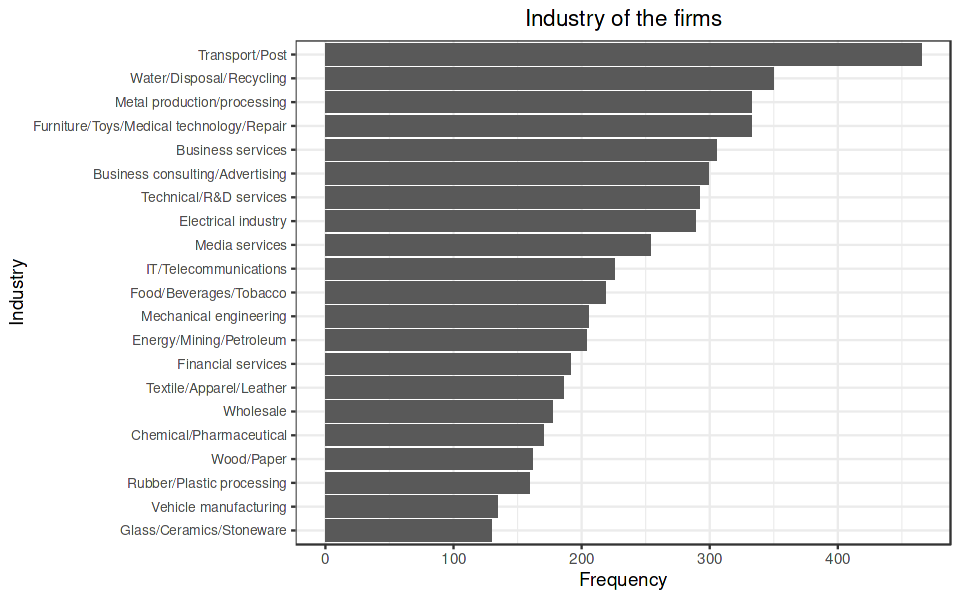

In [5]:
# industry: branche
translation = c("Transport/Post", "Water/Disposal/Recycling", "Metal production/processing",
                "Furniture/Toys/Medical technology/Repair", "Business services",
                "Business consulting/Advertising", "Technical/R&D services",
                "Electrical industry", "Media services", "IT/Telecommunications",
                "Food/Beverages/Tobacco", "Mechanical engineering", "Energy/Mining/Petroleum",
                "Financial services", "Textile/Apparel/Leather", "Wholesale", "Chemical/Pharmaceutical",
                "Wood/Paper", "Rubber/Plastic processing", "Vehicle manufacturing",
                "Glass/Ceramics/Stoneware")
# set graph size
options(repr.plot.width = 8, repr.plot.height = 5)
survey %>%
    # select the column branche
    .[, .(branche)] %>%
    # summarize the frequency of each category
    table() %>%
    as.data.table() %>%
    .[order(-N)] %>%
    # add translation of branche
    .[, industry := translation] %>%
    # plot the bar chart
    ggplot(aes(x = reorder(industry, N), y = N)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    labs(x = "Industry", y = "Frequency", title = "Industry of the firms") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) + 
    theme(axis.text.y = element_text(size = 8))

In [6]:
# bran_4 - big category of industry
survey %>%
    .[, .(bran_4)] %>%
    table() %>%
    as.data.table()

bran_4,N
<chr>,<int>
Forschungsintensive Industrie,798
Sonstige Dienstleistungen,947
Sonstige Industrie,2164
Wissensintensive Dienstleistungen,1174


## Bivariate analysis

We will then look at the relationship between industry and other variables, such as

- bges: full time employees (size of the firm)
- bhsp: share of high skilled employees (with university degree)
- 